# Data Exploration and Manipulation

In [74]:
#Importing the necessary libraries for data exploration.
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mt
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager

In [75]:
#Since the file has been treated now with Azure Machine Learning Studio. I will now import this file 
#for further exploration
df=pd.read_csv("/home/emad/Documents/DAP/Final KK Treated Missing Data File.csv")

In [76]:
#Again after the treatment there was an extra column of index which is not required
#Deleting the extra index column for simplicity using the delete function.
del df['Column 0']
df.head()

,State,City,Year,Population,Violent\Crime,Murder,Rape Revised,Rape Legacy,Robbery,Aggravated\Assault,Property\Crime,Burglary,Larceny\Theft,Motor\Vehicle\Theft,Arson
0,ALABAMA,BIRMINGHAM,2014,212115,1619,23,83,27,454,1059,6596,1716,4169,711,76
1,ALABAMA,BIRMINGHAM,2015,227599,1756,30,77,30,507,1142,6246,1446,4120,680,72
2,ALABAMA,HUNTSVILLE,2014,187624,770,12,50,23,188,520,4376,908,3111,357,12
3,ALABAMA,HUNTSVILLE,2015,201320,723,5,65,25,173,480,4121,836,2903,382,40
4,ALABAMA,MOBILE5,2014,250655,747,17,67,24,203,460,5747,1461,4039,247,54


In [77]:
#Using the describe function to view the data file details
df.describe()

,Year,Population,Violent\Crime,Murder,Rape Revised,Rape Legacy,Robbery,Aggravated\Assault,Property\Crime,Burglary,Larceny\Theft,Motor\Vehicle\Theft,Arson
count,520.000000,5.200000e+02,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,2014.500000,3.146198e+05,906.965385,11.728846,72.692308,34.163462,298.292308,528.878846,4840.298077,934.865385,3348.625000,551.769231,31.459615
std,0.500481,6.573584e+05,2022.880138,24.864130,112.373369,38.277435,728.707978,1195.128187,7294.887681,1317.696353,5267.192308,937.792711,64.347341
min,2014.000000,1.000250e+05,21.000000,0.000000,0.000000,1.000000,6.000000,12.000000,541.000000,65.000000,346.000000,13.000000,0.000000
25%,2014.000000,1.252165e+05,176.250000,1.000000,24.000000,23.000000,50.000000,95.750000,1595.250000,287.750000,1074.750000,120.000000,6.000000
50%,2014.500000,1.683200e+05,364.000000,4.000000,40.500000,28.000000,102.500000,220.500000,2456.000000,467.000000,1739.500000,259.500000,12.000000
75%,2015.000000,2.574838e+05,780.000000,10.000000,69.250000,34.000000,227.500000,477.000000,4817.000000,969.750000,3407.750000,486.250000,28.250000
max,2015.000000,9.092535e+06,24191.000000,207.000000,1082.000000,518.000000,7691.000000,15279.000000,63155.000000,10826.000000,52230.000000,7524.000000,675.000000


In [78]:
#All the data types after the treatment are now changed. Using the data type function I can confirm what data types
#each column holds.
df.dtypes

State                  object
City                   object
Year                    int64
Population              int64
Violent\Crime           int64
Murder                  int64
Rape Revised            int64
Rape Legacy             int64
Robbery                 int64
Aggravated\Assault      int64
Property\Crime          int64
Burglary                int64
Larceny\Theft           int64
Motor\Vehicle\Theft     int64
Arson                   int64
dtype: object

/home/emad/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


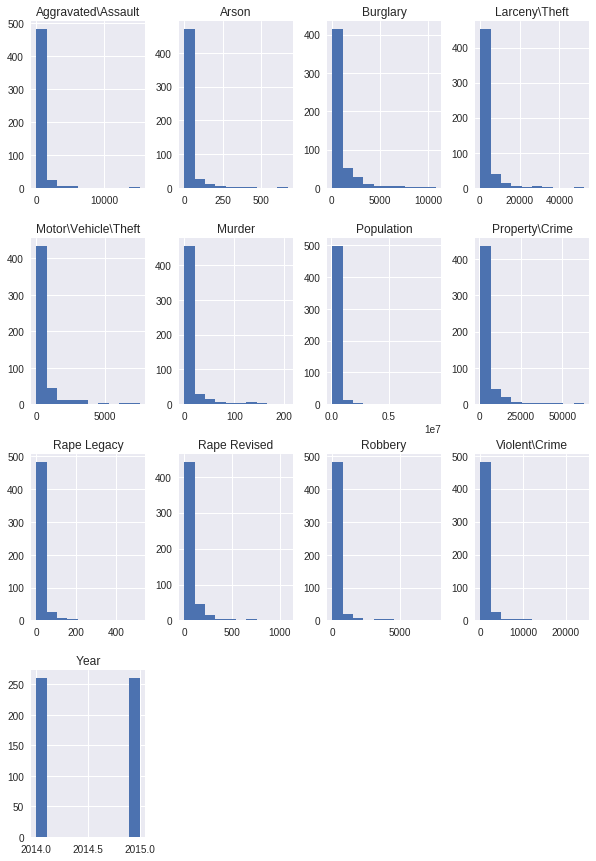

In [79]:
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

In [80]:
#For simlicity, if there is a need to analyse the total number of crimes, I have made a separate column of total crimes. 
df['Total Crimes']=df['Violent\Crime']+df['Murder']+df['Rape Revised']+df['Rape Legacy']+df['Robbery']+df['Aggravated\Assault']+df['Property\Crime']+df['Burglary']+df['Larceny\Theft']+ df['Motor\Vehicle\Theft']+df['Arson']                

In [83]:
#It can be seen below.
df['Total Crimes'].head()

0    16533
1    16106
2    10327
3     9753
4    13066
Name: Total Crimes, dtype: int64

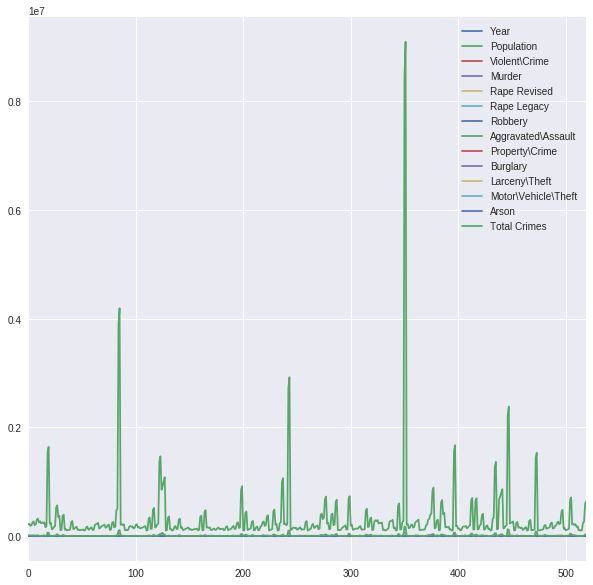

In [84]:
# just to see the spread of the column values, it can be seen the data is very unevenly distributed. Great deal of
#statistical measures need to take place for the normalization of the data.
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.plot(ax=ax)
plt.show()

In [85]:
#First I have computed the Z-score of each value in the column,relative to the column mean and standard deviation. 
#Then it takes the absolute of Z-score because the direction does not matter, only if it is below the threshold. 
#.all(axis=1) ensures that for each row, all column satisfy the constraint. 
#Finally, result of this condition is used to index the dataframe.
from scipy import stats
reducedData=df.drop(df.columns[[0, 1]], axis=1)
reducedData=reducedData[(np.abs(stats.zscore(reducedData)) < 3).all(axis=1)]

In [91]:
#After the data reduction based on the Z score we get the following results. reduced data file hass 488 rows where
#as the orignal treated data frame has 520 rows.
reducedData.shape

(488, 14)

In [93]:
df.shape

(520, 16)

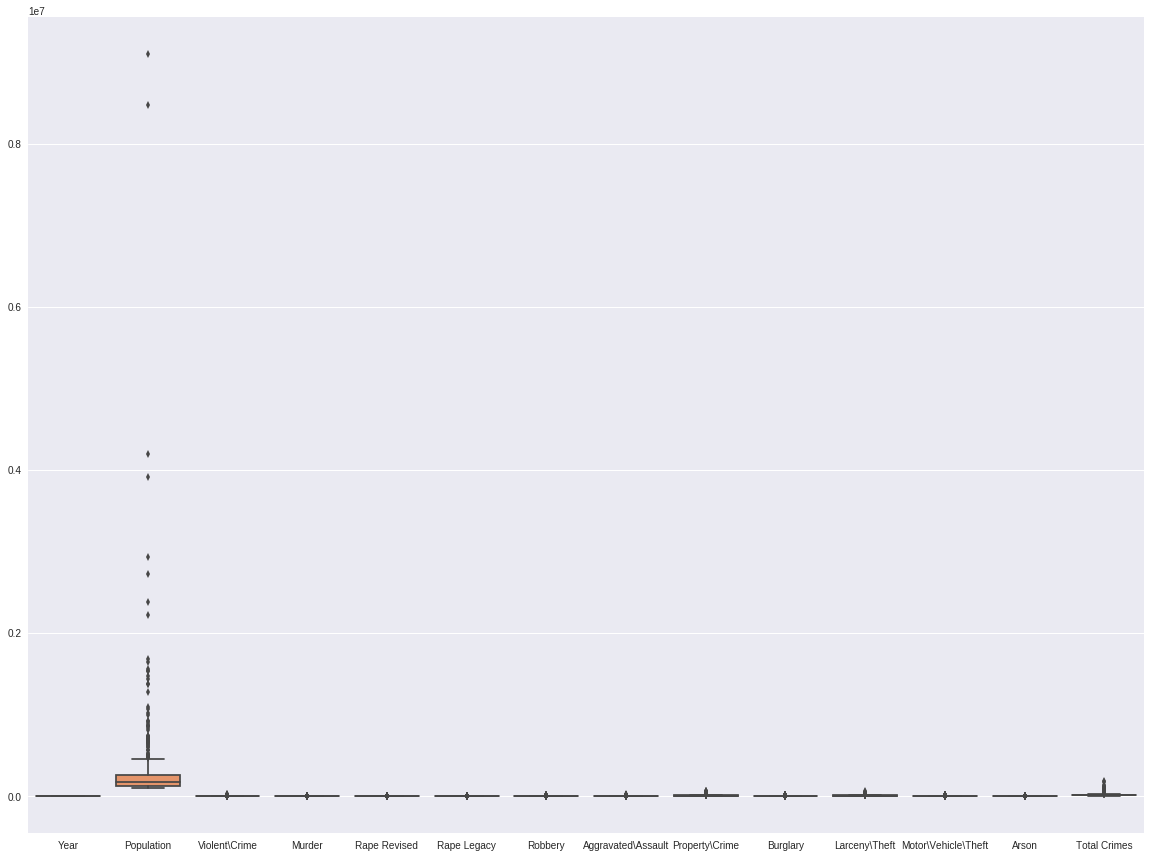

In [94]:
#I will now create box plots using Seaborn library. The boplots for the data set can be seen below.
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
sb.boxplot(data=df,ax=ax)
plt.show()

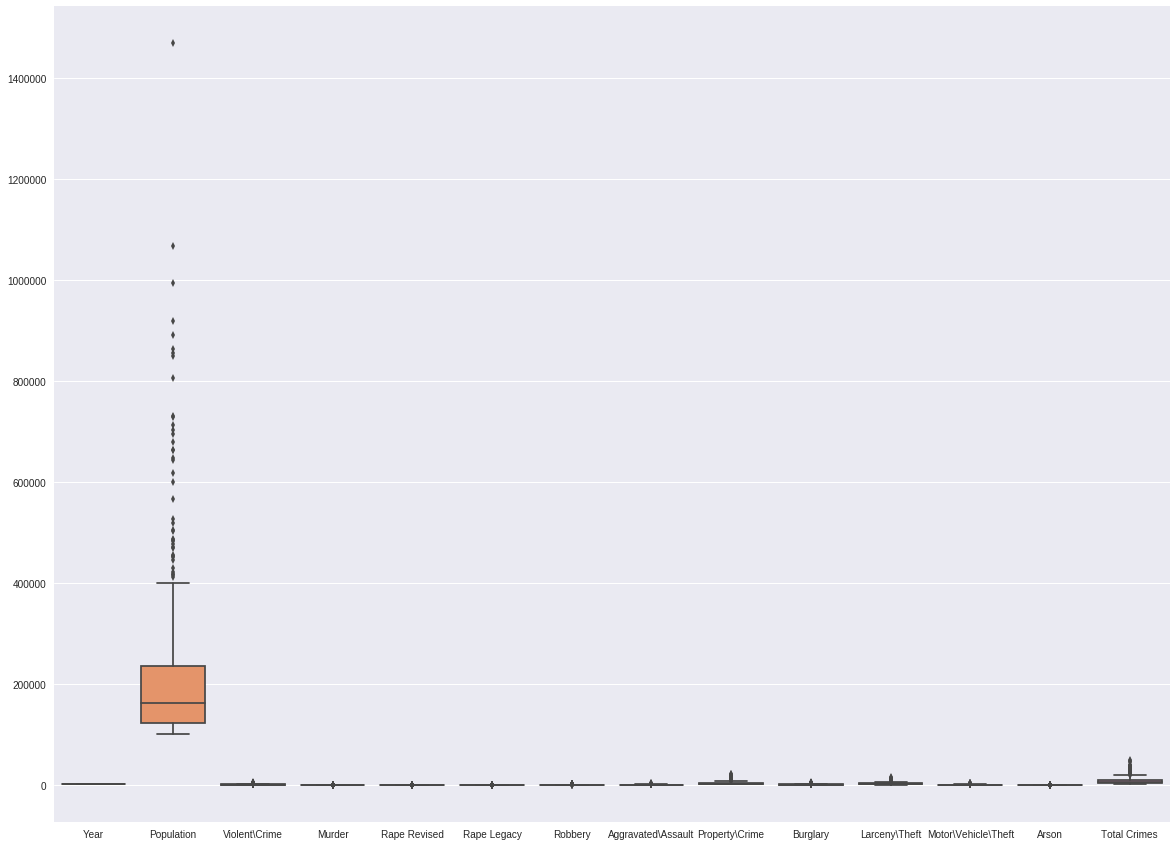

In [95]:
#The boxplot below is actually for the reduced data and the results are much clearer and better. As compared to the 
#boxplot earlier, now more values are within the box and lesser values are outside the boxplot. Giving us a confidence
#that data reduction worked well. But it can be much improved in future versions of the analysis.
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
sb.boxplot(data=reducedData,ax=ax)
plt.show()

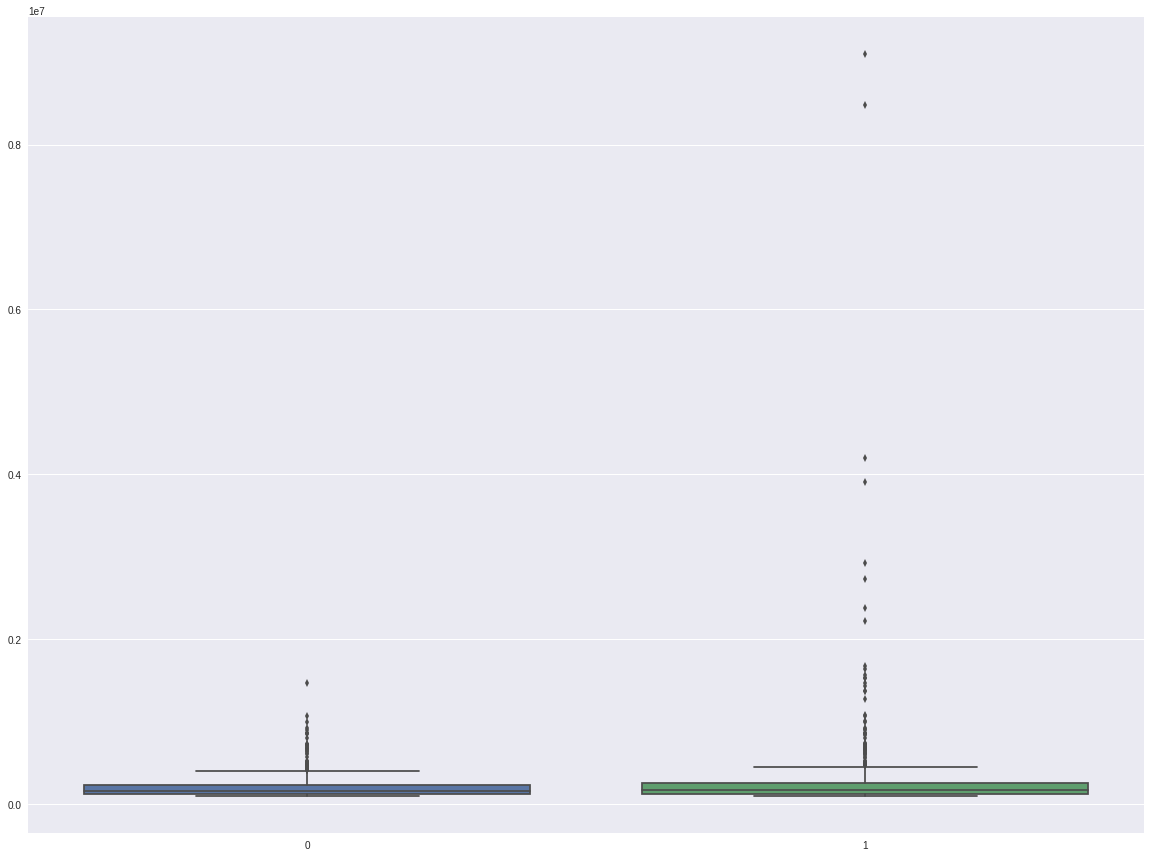

In [69]:
#Boxplot Comparison Between Normalized and Orignal data set. Here I have compared the boxplots again but this time
#its only for two columns so I can have a closer look on the columns. The boxplot here is for population column
#from both data frames and the reduced data frame has better results then the orignal one.

fig = plt.figure(figsize = (20,15))
ax = fig.gca()
sb.boxplot(data=[reducedData['Population'],df['Population']],ax=ax)
plt.show()

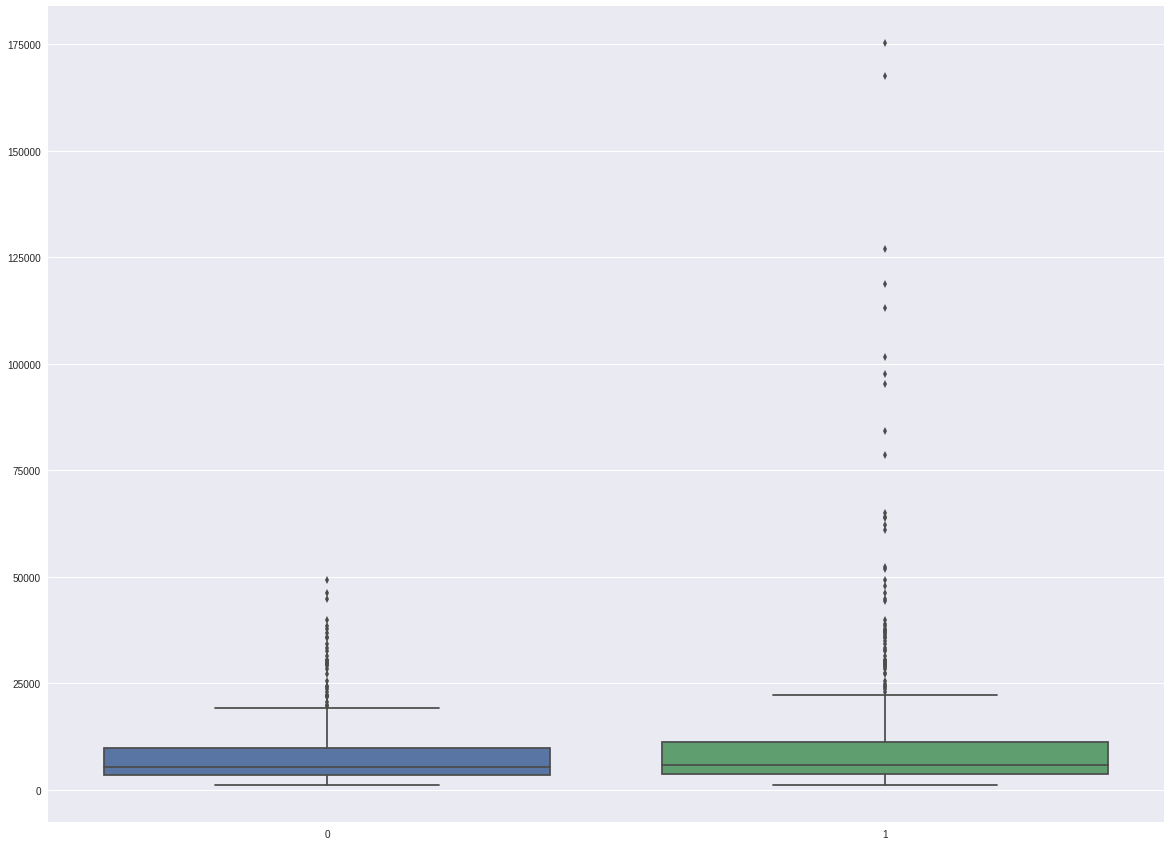

In [70]:
#Boxplot Comparison Between Normalized and Orignal data set. Similar results are obtained for Total Crimes columns
#from different data frames.

fig = plt.figure(figsize = (20,15))
ax = fig.gca()
sb.boxplot(data=[reducedData['Total Crimes'],df['Total Crimes']],ax=ax)
plt.show()

/home/emad/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


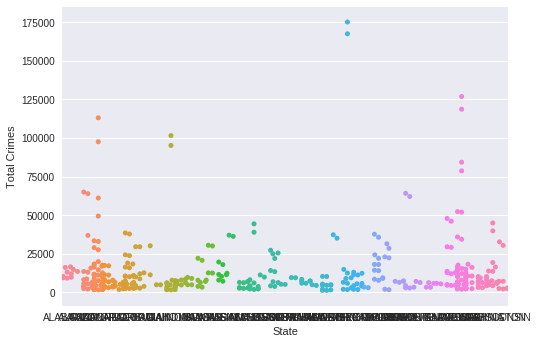

In [96]:
#Seaborn has very nice way visualizing data and they are some what considered better aginst matplolib. Here I have 
#drawn the swarm plot for states and total crimes. 
sb.swarmplot(x='State', y='Total Crimes', data=df)
plt.legend(data=df['State'])
plt.show()

  #label='ALABAMA','Alaska','Arizona','California','Colorado','Connecticut','Florida','Georgia','Hawai','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','MaryLand','Massachusetts','Michigan','Mississippi','Missouri','Montana','Nebraska','Nevada', 'New Hampshire','New Jersey','New York', 'North Carolina','North Dakota','Ohio',
     #         'Oklahama','Pennsylvania','Rhode Island','South Carolina','Tennesee','Texas','Utah','Virginia','Washington',
      #        'Wisconsin')

In [97]:
#Now after the swarm plot plot I wanted to see which states are having the most number of crimes for that I will create
#a new data frame and sort them in descending order. Then I have used the head function to see the top 10 values
dfTopCrimes=df.sort_values('Total Crimes',ascending=False)
dfTopCrimes.head(10)

,State,City,Year,Population,Violent\Crime,Murder,Rape Revised,Rape Legacy,Robbery,Aggravated\Assault,Property\Crime,Burglary,Larceny\Theft,Motor\Vehicle\Theft,Arson,Total Crimes
350,NEW YORK,NEW YORK,2014,8473938,24191,146,1075,138,7691,15279,63155,7433,52230,3492,375,175205
351,NEW YORK,NEW YORK,2015,9092535,23225,164,1082,141,7598,14381,60300,6410,50526,3364,366,167557
446,TEXAS,HOUSTON,2014,2219933,10401,100,407,416,4717,5168,52686,10826,34814,7046,341,126922
447,TEXAS,HOUSTON,2015,2381988,10216,144,374,90,4777,4921,48909,9597,32644,6668,332,118672
85,CALIFORNIA,LOS ANGELES,2015,4191966,10814,128,665,109,4274,5747,45362,8190,29648,7524,638,113099
242,ILLINOIS,CHICAGO,2014,2724121,10888,175,654,85,4400,5659,39749,6649,28326,4774,223,101582
84,CALIFORNIA,LOS ANGELES,2014,3906772,8700,132,522,98,3619,4427,39703,6875,26431,6397,675,97579
243,ILLINOIS,CHICAGO,2015,2922981,10969,207,622,89,4051,6089,36468,5650,26005,4813,242,95205
472,TEXAS,SAN ANTONIO,2014,1428465,3757,43,324,518,885,2311,38179,6230,28292,3657,139,84335
473,TEXAS,SAN ANTONIO,2015,1532742,4005,51,509,65,915,2530,35261,5576,26572,3113,119,78716


In [98]:
#To make it easier to understand I have just chosen three columns for better idea without any extra column
finalDFCitiesandTopCrime=dfTopCrimes[['State','City','Total Crimes']]
finalDFCitiesandTopCrime.head(10)

,State,City,Total Crimes
350,NEW YORK,NEW YORK,175205
351,NEW YORK,NEW YORK,167557
446,TEXAS,HOUSTON,126922
447,TEXAS,HOUSTON,118672
85,CALIFORNIA,LOS ANGELES,113099
242,ILLINOIS,CHICAGO,101582
84,CALIFORNIA,LOS ANGELES,97579
243,ILLINOIS,CHICAGO,95205
472,TEXAS,SAN ANTONIO,84335
473,TEXAS,SAN ANTONIO,78716


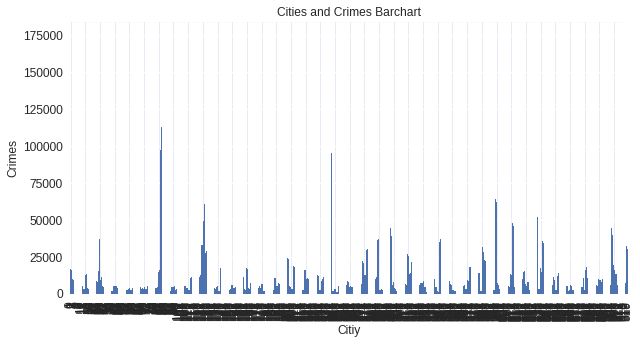

In [102]:
#To support the top ten total crimes. I have created a bar chart that shows the crimes happening in each city. But I 
#will only consider top ten for now as I want to make sure the data set is ready for detailed statistical analysis.
ax = df[['Total Crimes','City']].plot(kind='bar', title ="Cities and Crimes Barchart", figsize=(10, 5), legend=False, fontsize=12)
ax.set_xlabel('Citiy', fontsize=12)
ax.set_ylabel("Crimes", fontsize=12)
plt.show()

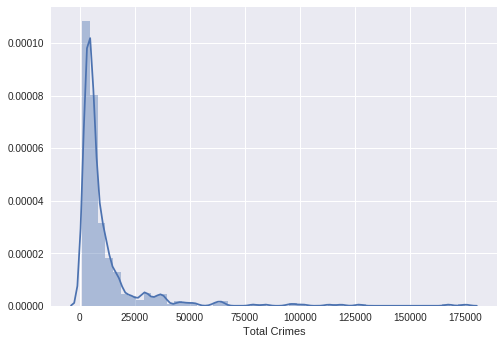

In [99]:
#The data set is not unimorly distributed as the numbers and standard deviation is very high. Below is the distribution
#of data from total crimes column which is also not uniformly distributed.
sb.distplot(df['Total Crimes'])
plt.show()